In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_excel("movie_data.xlsx")
df.head()

,Movie,DomesticBoxOffice,OpeningTheaterCount,OpeningWeekendBox Office,MaxTheaterCount,url_part,Production Budget,Domestic Releases,MPAA Rating,Running Time,Franchise,Source,Genre,Production Method,Creative Type,Production Companies,Production Countries
0,Rogue One: A Star Wars Story,532177324,4157,155081681,4157,Rogue-One-A-Star-Wars-Story,200000000.0,December 16th 2016,PG-13,134,Star Wars,Spin-Off,Adventure,Animation/Live Action,Science Fiction,Lucasfilm,United States
1,Finding Dory,486295561,4305,135060273,4305,Finding-Dory,200000000.0,June 17th 2016,PG,103,Finding Nemo,Original Screenplay,Adventure,Digital Animation,Kids Fiction,Disney-Pixar,United States
2,Captain America: Civil War,408084349,4226,179139142,4226,Captain-America-Civil-War,250000000.0,May 6th 2016,PG-13,146,Captain AmericaMarvel Cinematic Universe,Based on Comic/Graphic Novel,Action,Live Action,Super Hero,Marvel,United States
3,The Secret Life of Pets,368384330,4370,104352905,4381,Secret-Life-of-Pets-The,75000000.0,July 8th 2016,PG,91,NaN,Original Screenplay,Adventure,Digital Animation,Kids Fiction,Illumination,United States
4,The Jungle Book,364001123,4028,103261464,4144,Jungle-Book-The,175000000.0,April 15th 2016,PG,105,NaN,Based on Fiction Book/Short Story,Adventure,Animation/Live Action,Fantasy,Walt,United States


In [3]:
df["MPAA Rating cat"] = df["MPAA Rating"].astype('category').cat.codes
df["Franchise cat"] = df["Franchise"].astype('category').cat.codes
df["Source cat"] = df["Source"].astype('category').cat.codes
df["Genre cat"] = df["Genre"].astype('category').cat.codes
df["Production Method cat"] = df["Production Method"].astype('category').cat.codes
df["Creative Type cat"] = df["Creative Type"].astype('category').cat.codes
df["Production Companies cat"] = df["Production Companies"].astype('category').cat.codes
df["Production Countries cat"] = df["Production Countries"].astype('category').cat.codes

#list(zip(df["MPAA Rating"].astype('category').cat.codes, df_labels.col2.cat.categories))

final = df.drop(["Movie", "DomesticBoxOffice", "MaxTheaterCount", "url_part", "MPAA Rating","Franchise", "Source",
       "Genre", "Production Method", "Creative Type", "Production Companies", "Production Countries"], axis = 1)

In [4]:
final["Domestic Releases"] = final["Domestic Releases"].str.replace('th', '')
final["Domestic Releases"] = final["Domestic Releases"].str.replace('rd', '')
final["Domestic Releases"] = final["Domestic Releases"].str.replace('st', '')
final["Domestic Releases"] = final["Domestic Releases"].str.replace('nd', '')
final["Domestic Releases"] = final["Domestic Releases"].str.replace('Augu', 'August')
final["Domestic Releases"] = final["Domestic Releases"].str.replace('Oscar Qualifying Run by Drafouse Films', '')
final["Domestic Releases"] = final["Domestic Releases"].str.replace(' ', '')
final = final[final["Domestic Releases"].str.contains("February12") == False]


final["Domestic Releases"] = pd.to_datetime(final["Domestic Releases"], format="%B%d%Y")
final = final.fillna(0)

final

,OpeningTheaterCount,OpeningWeekendBox Office,Production Budget,Domestic Releases,Running Time,MPAA Rating cat,Franchise cat,Source cat,Genre cat,Production Method cat,Creative Type cat,Production Companies cat,Production Countries cat
0,4157,155081681,200000000.0,2016-12-16,134,2,61,17,1,0,6,97,41
1,4305,135060273,200000000.0,2016-06-17,103,1,21,15,1,1,5,52,41
2,4226,179139142,250000000.0,2016-05-06,146,2,10,0,0,2,7,100,41
3,4370,104352905,75000000.0,2016-07-08,91,1,-1,15,1,1,5,79,41
4,4028,103261464,175000000.0,2016-04-15,105,1,-1,2,1,0,3,167,41
6,3827,75063401,150000000.0,2016-03-04,108,1,-1,15,1,1,5,167,41
7,4242,166007347,250000000.0,2016-03-25,151,2,41,0,0,2,7,168,41
8,4255,133682248,175000000.0,2016-08-05,123,2,13,0,0,2,7,168,41
9,4022,35258145,75000000.0,2016-12-21,108,1,-1,15,1,1,5,79,41
10,3875,56631401,150000000.0,2016-11-23,113,1,-1,15,8,1,5,167,41


In [5]:
final["year"] = final["Domestic Releases"].dt.year
final["month"] = final["Domestic Releases"].dt.month
final["day"] = final["Domestic Releases"].dt.day
final.drop("Domestic Releases", axis = 1, inplace=True)

<IPython.core.display.Javascript object>


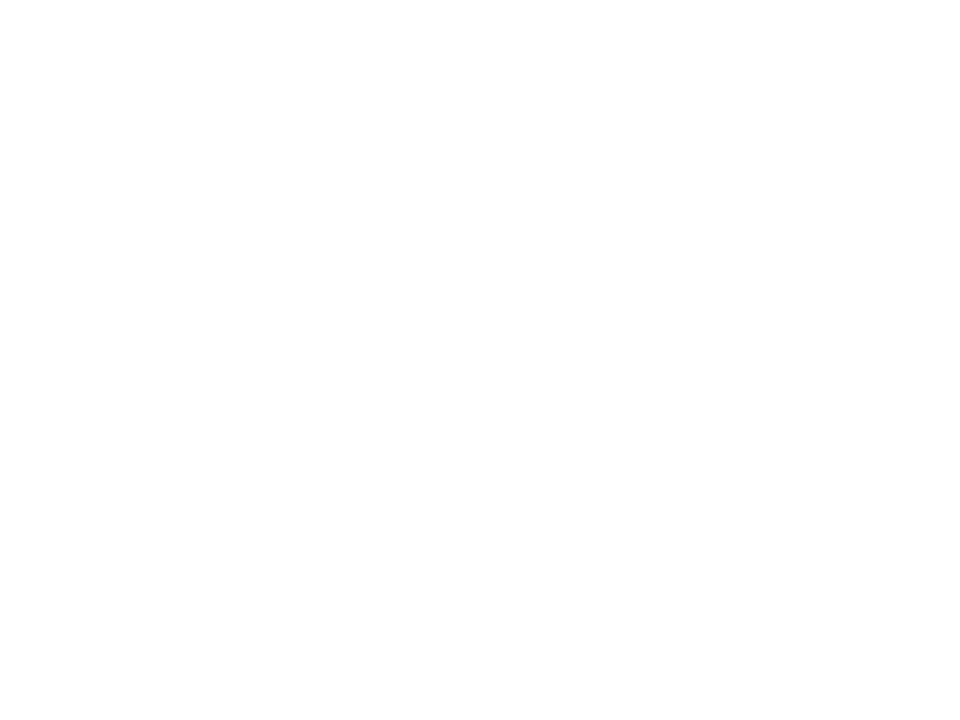

<IPython.core.display.Javascript object>


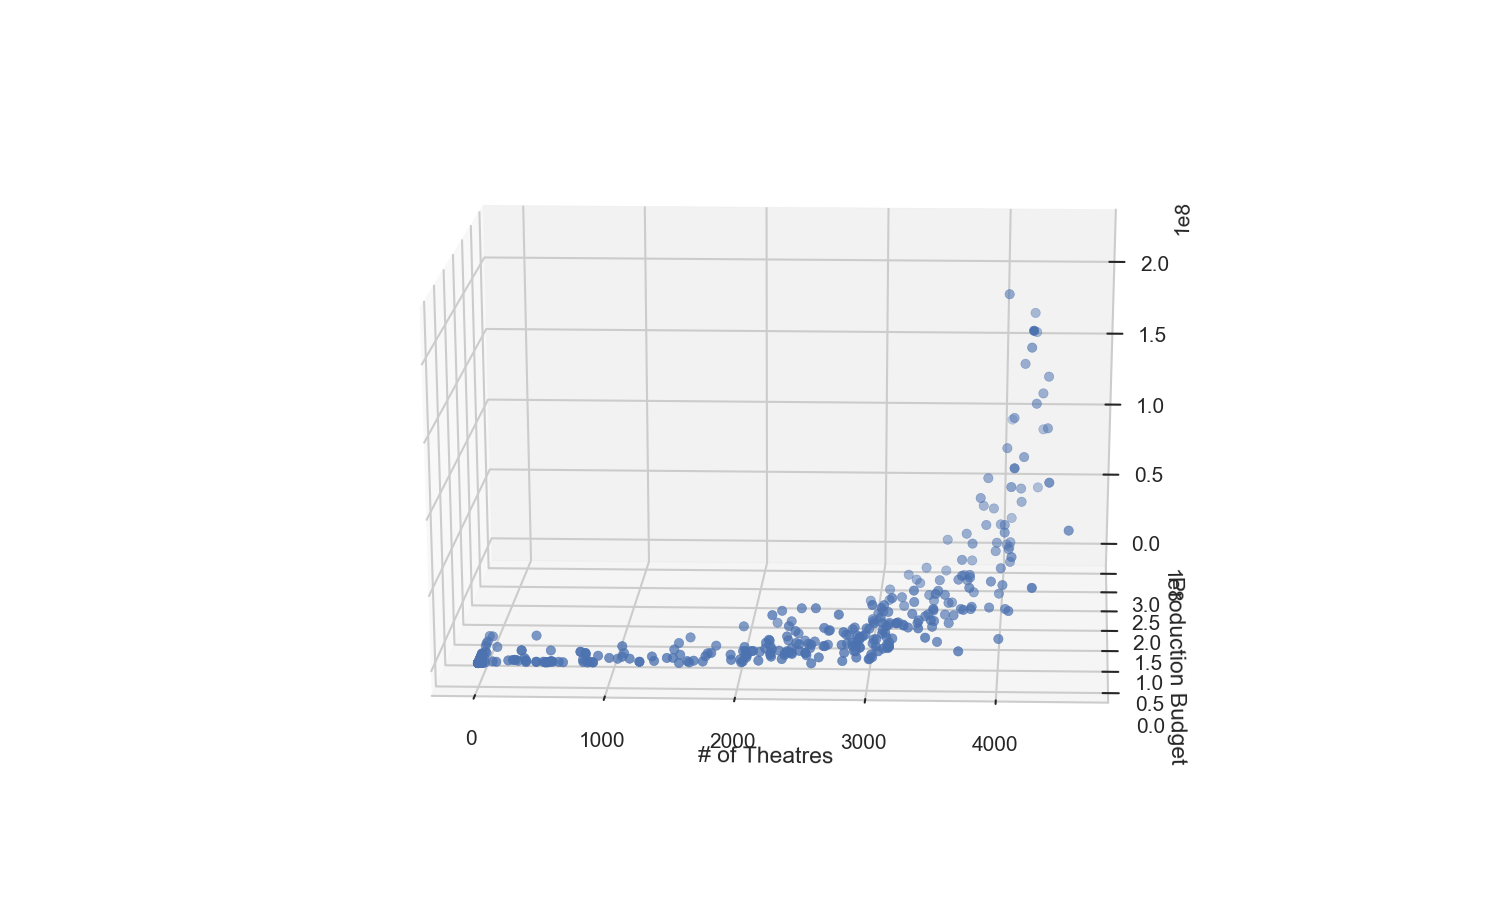

In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
plt.clf()
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(final["OpeningTheaterCount"],final["Production Budget"],final["OpeningWeekendBox Office"])
ax.set_xlabel("# of Theatres")
ax.set_ylabel("Production Budget")
plt.show()

In [ ]:
plt.scatter(final["Production Budget"], final["OpeningWeekendBox Office"])

In [ ]:
better = final[["OpeningTheaterCount","Production Budget","Running Time", "year","month","day","OpeningWeekendBox Office"]]
better.head()

In [ ]:
y = final.pop("OpeningWeekendBox Office")
X = final

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test["OpeningTheaterCount"], y_test,  color='black')
plt.plot(X_test["OpeningTheaterCount"], y_pred, 'bo', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
X_train.head()

In [ ]:
y = better.pop("OpeningWeekendBox Office")
X = better

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
print(X_test.head())
plt.scatter(X_test["Production Budget"], y_test,  color='black')
plt.plot(X_test["Production Budget"], y_pred, 'bo', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()